In [39]:
def extract_features(images_arr):
    length = len(images_arr) # length is 5000 for both train0 and train1
    pixels_per_image = images_arr[0].size # 784 pixels per image
    # reshape each trainset from 3D (5000, 28, 28) to 2D (5000, 784), thus flattening each individual pixels array
    images_arr_reshaped = images_arr.reshape(length, pixels_per_image)
    # mean and standard deviation are calculated along axis 1 (rows) of each trainset. Each row represents 1 image array
    mean = np.mean(images_arr_reshaped, axis=1)
    sd = np.std(images_arr_reshaped, axis=1)
    return mean, sd

In [40]:
def calculate_parameters(features):
    mean = np.mean(features)
    var = np.var(features)
    return mean, var

In [41]:
def calculate_pdf(test_datapoints, mean, variance):
    # probabilites of each test datapoint in test_datapoints array are calculated element-wise
    pdf =  (np.exp(-np.square(test_datapoints - mean) / (2 * variance))) / ((2 * variance)/(np.sqrt(2 * np.pi * variance)))
    return pdf

In [ ]:
import numpy as np
import scipy.io
import math
import geneNewData
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def main():
    myID='1391' #change to last 4 digit of your studentID
    geneNewData.geneData(myID)
    Numpyfile0 = scipy.io.loadmat('digit0_stu_train'+myID+'.mat')
    Numpyfile1 = scipy.io.loadmat('digit1_stu_train'+myID+'.mat')
    Numpyfile2 = scipy.io.loadmat('digit0_testset'+'.mat')
    Numpyfile3 = scipy.io.loadmat('digit1_testset'+'.mat')
    train0 = Numpyfile0.get('target_img')
    train1 = Numpyfile1.get('target_img')
    test0 = Numpyfile2.get('target_img')
    test1 = Numpyfile3.get('target_img')
    #print([len(train0),len(train1),len(test0),len(test1)])
    #print('Your trainset and testset are generated successfully!')

    # extract the two features (mean and standard deviation) of each 28x28 image in the training sets
    mean0, sd0 = extract_features(train0)
    train0_2d = np.column_stack((mean0, sd0))
    mean1, sd1 = extract_features(train1)
    train1_2d = np.column_stack((mean1, sd1))   

    # extract the two features (mean and standard deviation) of each 28x28 image in the testing sets
    test_mean0, test_sd0 = extract_features(test0)
    test0_2d = np.column_stack((test_mean0, test_sd0))
    test_mean1, test_sd1 = extract_features(test1)
    test1_2d = np.column_stack((test_mean1, test_sd1))

    # calculate the parameters for the PDF of each class
    mean_feature1_0, var_feature1_0 = calculate_parameters(mean0)
    mean_feature2_0, var_feature2_0 = calculate_parameters(sd0)
    mean_feature1_1, var_feature1_1 = calculate_parameters(mean1)
    mean_feature2_1, var_feature2_1 = calculate_parameters(sd1)
    
    # P(x|y=0) = P(feature1 of x|y=0) * P(feature2 of x | y=0)  where x is a sample image from test0 
    likelihood_0_testset0 = calculate_pdf(test_mean0, mean_feature1_0, var_feature1_0) * calculate_pdf(test_sd0, mean_feature2_0, var_feature2_0)
    
    # P(x|y=1) = P(feature1 of x|y=0) * P(feature2 of x | y=0)  where x is a sample image from test0
    likelihood_1_testset0 = calculate_pdf(test_mean0, mean_feature1_1, var_feature1_1) * calculate_pdf(test_sd0, mean_feature2_1, var_feature2_1)
    
    # make a prediction whether a value in test0 belongs to class 0 or 1 by returning the class of the greater likelihood value
    prediction_testset0 = []
    for i in range(len(likelihood_0_testset0)):
        if likelihood_0_testset0[i] > likelihood_1_testset0[i]: 
            prediction_testset0.append(0)
        else: prediction_testset0.append(1)
    
    # P(x|y=0) = P(feature1 of x|y=0) * P(feature2 of x | y=0)  where x is a sample image from test1
    likelihood_0_testset1 = calculate_pdf(test_mean1, mean_feature1_0, var_feature1_0) * calculate_pdf(test_sd1, mean_feature2_0, var_feature2_0) 
    
    # P(x|y=1) = P(feature1 of x|y=1) * P(feature2 of x | y=0)  where x is a sample image from test1
    likelihood_1_testset1 = calculate_pdf(test_mean1, mean_feature1_1, var_feature1_1) * calculate_pdf(test_sd1, mean_feature2_1, var_feature2_1)
    
    # make a prediction whether a value in test1 belongs to class 0 or 1 by returning the class of the greater likelihood value
    prediction_testset1 = []
    for i in range(len(likelihood_0_testset1)):
        if likelihood_0_testset1[i] > likelihood_1_testset1[i]: 
            prediction_testset1.append(0)
        else: prediction_testset1.append(1)
            
    #sum all the 1 values (wrongs predictions) and subtract from test0 length to get num of 0s
    accuracy_testset0 = (len(prediction_testset0) - sum(prediction_testset0)) / len(test0)

    #sum all 1s (disregard wrongs predictions of 0)
    accuracy_testset1 = sum(prediction_testset1) / len(test1)
    
    print("actual number of zeros in digit0 testset:", len(test0))
    print("predicted number of zeros in digit0 testset:", len(prediction_testset0) - sum(prediction_testset0))
    print("number of incorrect predictions:", len(test0) - (len(prediction_testset0) - sum(prediction_testset0)))
    print("accuracy:", np.round(accuracy_testset0 * 100, 2), "%")
    cm0 = confusion_matrix(np.zeros(len(prediction_testset0)),prediction_testset0)
    cm1 = confusion_matrix(np.ones(len(prediction_testset1)),prediction_testset1)
    cm = cm0+cm1
    sns.heatmap(cm, 
            annot=True,
            fmt='g')
    plt.ylabel('Actual',fontsize=13)
    plt.xlabel('Prediction',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    result = ["1391", mean_feature1_0, var_feature1_0, mean_feature2_0, var_feature2_0, mean_feature1_1, var_feature1_1, mean_feature2_1, var_feature2_1, accuracy_testset0, accuracy_testset1]
    return result


if __name__ == '__main__':
    main()

# **Note:**

* Your output should be a list in the following format:
['ASUId',
Mean_of_feature1_for_digit0, Variance_of_feature1_for_digit0,
Mean_of_feature2_for_digit0, Variance_of_feature2_for_digit0 ,
Mean_of_feature1_for_digit1, Variance_of_feature1_for_digit1,
Mean_of_feature2_for_digit1, Variance_of_feature2_for_digit1,
Accuracy_for_digit0testset, Accuracy_for_digit1testset]
* The **order** of these 11 components are important.
* Please print the result in the same cell that contains the comment `"### TEST FUNCTION: test_question1"` so that the autograder can capture your output and provide accurate feedback. Do not print anything else in the code cell below.
* You can divide the code into different cells but the output should be printed in the cell containing the comment `"### TEST FUNCTION: test_question1"` 


actual number of zeros in digit0 testset: 980
predicted number of zeros in digit0 testset: 899
number of incorrect predictions: 81
accuracy: 91.73 %


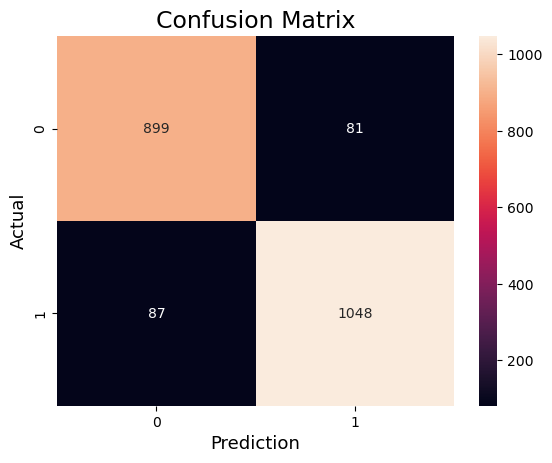

['1391', 44.16709005102041, 116.55307458838448, 87.38473381655496, 102.99175290160784, 19.400870153061224, 31.92200532942518, 61.39287609944414, 83.60005463130301, 0.9173469387755102, 0.9233480176211454]


In [44]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE THE ABOVE LINE
print(main())